In [1]:
## 계층적 군집분석
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df = pd.DataFrame(data=iris.data, columns=cols)
df["target"]=iris.target
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# target변수의 종별 개수
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
# 계층적 군집분석 model
# method=single, complete, average
clusters = linkage(y=df, method='complete', metric='euclidean')
clusters
clusters.shape 

(149, 4)

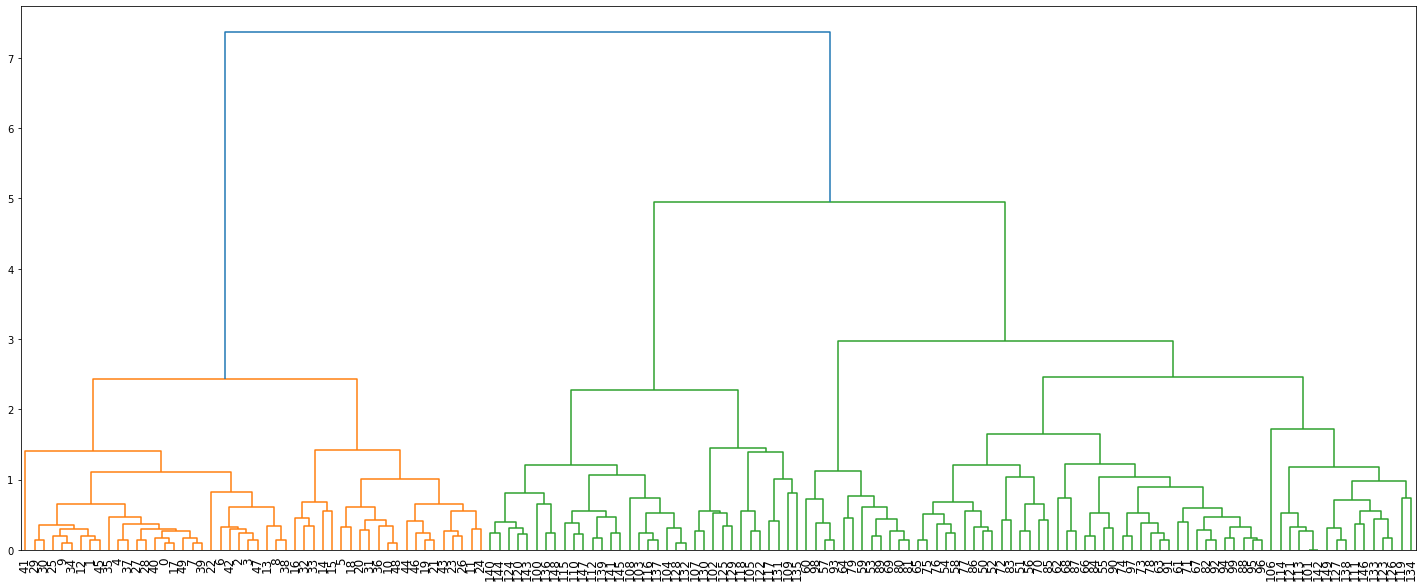

In [6]:
# 덴드로그램 시각화 : 군집수 결정
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈
plt.show() 

In [7]:
# 클러스터링(군집) 결과
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

In [15]:
cut_tree = fcluster(clusters, t=3, criterion='distance')
cut_tree # prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [19]:
# 군집분석결과(분류예측)과 실제값의 비교
labels = df['target'] # 정답
df1 = pd.DataFrame({'pred':cut_tree, 'labels':labels})
con_mat = pd.crosstab(df1['pred'], df1['labels'])
con_mat

labels,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [11]:
# df자료에 군집분석 예측치 추가
df['cluster'] = cut_tree
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [12]:
# 클러스터별 독립변수들의 평균수치로 cluster의 특징을 파악.
cluster_g = df.groupby('cluster')
cluster_g.mean()

,sepal_length,sepal_width,petal_length,petal_width,target
cluster,,,,,
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.888235,3.100000,5.805882,2.123529,2.000000
3,5.939394,2.754545,4.442424,1.445455,1.242424


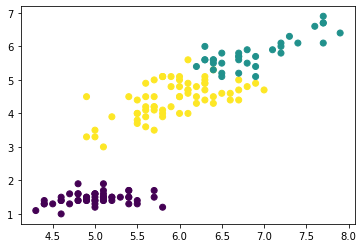

In [13]:
# 클러스터 단위 산점도 시각화
plt.scatter(x=df['sepal_length'], y=df['petal_length'], c=df['cluster'])

In [14]:
## 비계층적 군집분석
import pandas as pd 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 

In [15]:
iris = load_iris()
cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df = pd.DataFrame(data=iris.data, columns=cols)
df["target"]=iris.target
df1=df[['sepal_length', 'petal_length']]  # 두 개의 칼럼만 이용

In [18]:
# 비계층적 군집 분석 model
model= KMeans(n_clusters=3, random_state=0, algorithm='auto')
# n_clusters=3 : 군집의 개수 (k) (이미 알고 있음)
# random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [19]:
#  클러스터링(군집) 결과 : 관측치 개수만큼 예측치 생성됨
pred = model.predict(df1)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [20]:
# K-평균군집분석결과(분류예측)과 실제값의 비교
labels = df['target'] # 정답
df2 = pd.DataFrame({'pred':pred, 'labels':labels})
con_mat = pd.crosstab(df2['pred'], df2['labels'])
con_mat

labels,0,1,2
pred,,,
0,50,1,0
1,0,45,13
2,0,4,37


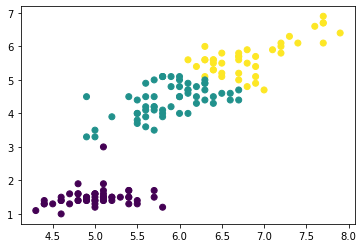

In [24]:
# 군집결과 시각화
plt.scatter(x=df['sepal_length'], y=df['petal_length'], c=pred)

In [25]:
## 적절한 군집수 찾기
from sklearn.cluster import KMeans
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


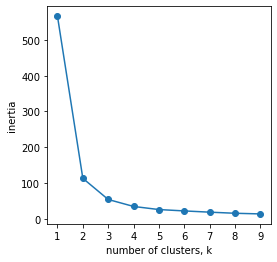

In [26]:
ks = range(1,10) 
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df1)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()